## 서울시기준, 자치구별 cctv, 인구현황분석
- 개별 데이터 분석
- 상관성 분석
- pandas 사용법 습득, 시각화 기초

### 1. 데이터 수집(획득) 및 로드

In [7]:
# 일반적으로 2가지가 형식적이다
import numpy as np
import pandas as pd

- pandas에서 엑셀(csv) 파일로드
- 데이터를 부분 확인 후 데이터의 이상여부 간단히 시각적 확인

In [8]:
# pd.read_ : 출처경로가 된다(의미: 경로출처)
s_cctv = pd.read_excel( '../data/seoul_cctv_state.xlsx', encoding='utf-8' ) # 엑셀로 안깨졌을 때 utf-8

In [9]:
# 전체확인
s_cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [10]:
# 상위값 확인
# s_cctv.head() # 5개 출력된다
s_cctv.head( 2 ) # 2개

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [11]:
# 하위값 확인
# s_cctv.tail() # 5개
s_cctv.tail( 2 ) # 2개 

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


 - 대략적으로 탐색한 결과 '동대문구'와 '중랑구'에 결측치 확인, NaN으로 표기 

In [12]:
# 탐색
# 컬럼명 확인
s_cctv.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [13]:
# '2011년 이전'이라는 컬럼명을 획득하고 싶을 경우
s_cctv.columns[2]

'2011년 이전'

In [14]:
# 데이터의 차원, 모습 확인 => shape
s_cctv.shape
# 1차원이 25개, 2차원이 10개 -> 튜플이 2개임:2차원이라는 뜻

(25, 10)

In [15]:
# 인덱스
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [16]:
s_cctv.index[1]

1

In [17]:
s_cctv.head(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [18]:
# 기관명을 => 자치구 명칭을 통일 => DataFrame의 컬럼명 변경하여 의미의 명확성 부여
# inplace : 파라미터는 원본을 변경할 것인가? True면 원본변경(반영)
# 키 : 이전명컬럼 , 값 : 신규컬럼명
s_cctv.rename( columns={ s_cctv.columns[0]:'자치구'}, inplace=True ) # columns= : 기본값 부여, {}: 딕셔너리

In [19]:
s_cctv.head(1)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448


### 실습
- s_pop이란 변수명으로 report.csv를 데이터를 로드하시오
- 데이터가 잘 오픈되지 않아서 일단 report.xls로 다시 받아서 동처리(동일한) 실행

In [20]:
# csv 파일은 오류못잡아서 홈페이지에서 엑셀파일 다운로드
# 데이터를 들여다보니 컬럼쪽이 2개가 더 많이 나타남 -> 해더를 2번으로 지정하여 갯수를 줄이겠다
# s_pop = pd.read_excel( '../data/report.xls', encoding='euc-kr')
# 필요없는 데이터는 로드 단계에서 걷어내곘다 -> 사전에 데이터를 보고 판단
# 필요한컬럼 : 자치구, 합계-계, 인구-한국인계, 인구-외국인계, 65세이상 고령자
s_pop = pd.read_excel( '../data/report.xls', encoding='euc-kr', header=2,  # 파일이 깨졌을 경우 : euc-kr
                       usecols='A,B,D,G,J,P' # usecols : 엑셀에서 필요한 컬럼을 가지고 오는 함수
                      )
s_pop.head(2)

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


In [21]:
# 컬럼명을 의미있게 조정
# 계~..고령자 까지. => 인구수, 한국인, 외국인, 고령자 
dic = {
    s_pop.columns[2]:'인구수',
    s_pop.columns[3]:'한국인',
    s_pop.columns[4]:'외국인',
    s_pop.columns[5]:'고령자'
}
s_pop.rename( columns=dic, inplace=True ) # inplace=true : 원본을 바꿔준다는 뜻
s_pop.head(2)

,기간,자치구,인구수,한국인,외국인,고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


## pandas 기초학습
<a href='http://localhost:8889/notebooks/Desktop/py_projects/analysis/pandas/basic/pandas_기초.ipynb'>이동하기</a>

## 데이터 특성파악

In [22]:
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [23]:
# 소계 컬럼을 중심으로 오른차순 정렬 
s_cctv.sort_values( by='소계', ascending=True).head(4) # 사본출력, 결과 안나오면 원본

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101


In [24]:
s_cctv.sort_values( by='소계', ascending=True).tail(4) 

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448


- 강남구, 구로구 지역은 상업지구가 많아서, 관악구나 성북구는 산을 타고 빌라촌이 많다
- 이런 지역에는 인구 밀도가 비교적 높아서(예상) 혹은 유동인구가 많아서 CCTV가 많을 것으로 예상된다
- 도봉구, 중랑구, 강북구등은 주거지가 많아서 적어 보이고, 종로구는 보류
- 2011년도 이전 대비, 향후 7년간 증가율 계산 
- 7년간 증가율 = (2012+2013+2014+~2018)/2011년 * 100

In [25]:
# 나중에 언제든 활용 가능하도록 만드는 것이 목적
tmp_sum = s_cctv['2012년'] + s_cctv['2013년'] + s_cctv['2014년'] + s_cctv['2015년'] + s_cctv['2016년'] + s_cctv['2017년'] + s_cctv['2018년']
tmp_sum

0     3277.0
1     1576.0
2     1022.0
3     1398.0
4     3555.0
5     1111.0
6     2375.0
7     1607.0
8     1425.0
9      661.0
10       NaN
11    1542.0
12    1350.0
13    1556.0
14    1663.0
15    2014.0
16    2224.0
17     986.0
18    2003.0
19    2363.0
20     784.0
21    1597.0
22    1463.0
23    1519.0
24       NaN
dtype: float64

In [26]:
# 행렬의 합
s_cctv['2012년'] + s_cctv['2013년'] 

0     511.0
1     521.0
2     229.0
3     273.0
4     475.0
5     125.0
6     568.0
7     259.0
8     320.0
9      74.0
10      NaN
11    122.0
12    177.0
13    447.0
14    319.0
15    227.0
16    388.0
17    187.0
18    346.0
19    327.0
20    353.0
21    182.0
22    606.0
23    279.0
24      NaN
dtype: float64

In [27]:
s_cctv['최신 증가율']=(tmp_sum) / (s_cctv['2011년 이전']) * 100
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신 증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,296.257796
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,335.532995


- 결측치가 이미 존재했던 중량구, 동대문구에 대한 조치 필요
> 결측치를 0으로 처리하는 방안
> 최초 데이터가 존재하는 년도까지 기준점으로 잡고가는 방향
> 최초 데이터에 대한 의구심을 가지고 다시 데이터를 수집 하는 방향
- 종로구는 초기 데이터가 워낙 작아서 증가율이 너무 크게 나온다
> 특정 구간까지는 xx년도 이전으로 묵어주는것이 나을듯하다
- 공공데이터 자료 검토 결과 2018년도와 2019년도 자료가 상이하다
- nan 처리 -> 0으로 진행
- 원래는, 자료 제공기관에 문의하여 확인과정이 필요하나, 절차상 생략하고, 2019년도 자료에서 2011년이전~2012, 2013, 2014 까지를 합산하여 새로운 컬럼 2014년도 이전을 생성할 것이다
- 필요없는 자료는 제거
- 2014년도 이전 자료 대비 2015~2018 최근증가율(4년간)이라는 항목으로 추가

### nan 처리 => 결측치 처리
- 결측값 채우기
> 1. 특정값
> 2. 앞방향으로 채우기 -> 시계열활용
> 3. 뒷방향으로 채우기 -> 시계열활용
> 4. 채우는 회수 제한
- 결측값 대체하기
> 변수별 평균으로 대체
- 결측값 처리
> 다른 변수의 값으로 대체
- 결측값 제거
> 아래 코드 참조(isnull 검사후 => 블리언인덱싱 이용 => 원데이터에 대상 index를 획득)
> any()로 검사후 참이면 해당 인덱스에 일치되는 데이터를 제거

In [28]:
# 결측값 채우기
s_cctv.fillna(0, inplace=True)
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신 증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,296.257796
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,335.532995


In [29]:
s_cctv.columns

Index(['자치구', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '최신 증가율'],
      dtype='object')

In [30]:
# 2011이전 ~ 2012, 2013, 2014만 추출
tmp = s_cctv.iloc[ :, [2,3,4,5] ]

In [31]:
tmp.sum(axis=1)

0     2885.0
1      883.0
2      546.0
3      722.0
4     1392.0
5      682.0
6     1607.0
7      387.0
8      881.0
9      456.0
10    1326.0
11     863.0
12     832.0
13    1126.0
14    1625.0
15     993.0
16    1408.0
17     808.0
18    1287.0
19     676.0
20    1739.0
21    1890.0
22     746.0
23     384.0
24     770.0
dtype: float64

In [32]:
# 밑의 소스코드와 동일한 소스코드가 된다
# s_cctv['2014년도 이전'] =  s_cctv[ '2011년도 이전' ] + s_cctv['2012'] + s_cctv['2013']...

In [33]:
# 2011년이전~2012, 2013, 2014 까지를 합산하여, 새로운 컬럼 2014년도 이전을 생성
s_cctv[ '2014년도 이전' ] = s_cctv.iloc[ :, [2,3,4,5]  ].sum(axis=1)

In [34]:
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신 증가율,2014년도 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959,2885.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013,883.0


In [35]:
rm_cols = s_cctv.columns[2:6]

In [36]:
try:    
    # 제거
    s_cctv.drop( rm_cols, inplace=True, axis=1 )
    print( s_cctv.head(2) )
except Exception as e:
    pass

     자치구    소계  2015년  2016년  2017년  2018년      최신 증가율  2014년도 이전
0  강 남 구  5221    546    765    577    448  168.569959     2885.0
1  강 동 구  1879    144    194    273    385  520.132013      883.0


In [37]:
s_cctv.head(2)

,자치구,소계,2015년,2016년,2017년,2018년,최신 증가율,2014년도 이전
0,강 남 구,5221,546,765,577,448,168.569959,2885.0
1,강 동 구,1879,144,194,273,385,520.132013,883.0


In [38]:
# 최신증가율을 다시 계산해서 세팅
tmp = s_cctv.iloc[ :, [2,3,4,5]  ].sum(axis=1)
s_cctv[ '최신증가율' ] = tmp / s_cctv[ '2014년도 이전' ] * 100
# 펜시 인덱싱을 통함 컬럼 재배치 후 사본 리턴
s_cctv = s_cctv.iloc[ :, [0,1,7,2,3,4,5,6] ]
s_cctv

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신 증가율
0,강 남 구,5221,2885.0,546,765,577,448,168.569959
1,강 동 구,1879,883.0,144,194,273,385,520.132013
2,강 북 구,1265,546.0,145,254,1,319,420.576132
3,강 서 구,1617,722.0,187,190,264,254,638.356164
4,관 악 구,3985,1392.0,609,619,694,671,826.744186
5,광 진 구,1581,682.0,64,21,468,346,236.382979
6,구 로 구,3227,1607.0,268,326,540,486,278.755869
7,금 천 구,1634,387.0,382,136,199,530,5951.851852
8,노 원 구,1906,881.0,461,298,110,156,296.257796
9,도 봉 구,858,456.0,59,155,117,71,335.532995


### 인구 현황 분석

In [39]:
s_pop.dtypes

기간      int64
자치구    object
인구수     int64
한국인     int64
외국인     int64
고령자     int64
dtype: object

In [40]:
# s_pop에서 기간이 2014~2018년도까지만 추출해라

In [41]:
s_pop_last = s_pop[ s_pop.기간 >= 2014]
s_pop_last.shape

(130, 6)

In [42]:
s_cctv.shape

(25, 8)

In [43]:
# 자치구 개수로 인구데이터 개수를 나눠보니 딱 안떨어진다 => 125가 되야 되는데
# 130이 되었다 => 년도별로 1개씩 데이터가 더 있다 
s_pop_last.shape[0] / s_cctv.shape[0]

5.2

In [44]:
s_pop_last.head(27)
# 년도별로 합계 데이터가 추가되어있다. 
# 합계를 제거해라 혹은 합계를 빼고 데이터프레임을 구성해라
s_pop_last = s_pop_last[s_pop_last.자치구 != '합계']
s_pop_last.shape

(125, 6)

In [45]:
# 데이터 매칭 정상
s_pop_last.shape[0] / s_cctv.shape[0]

5.0

In [46]:
# 데이터 프레임을 합쳐서 진행할 것인데, 자치구 데이터들이 고유한지 체크
len(s_cctv['자치구'].unique()), len(s_pop_last['자치구'].unique())

(25, 25)

In [47]:
# NaN 검출
s_cctv['자치구'].isnull().head(2)

0    False
1    False
Name: 자치구, dtype: bool

In [48]:
# NaN 데이터를 제거할 때는
nanidx = s_cctv[s_cctv['자치구'].isnull()].index
if nanidx.any():
    s_cctv.drop([nanidx], inplace=True)

In [49]:
s_pop_last.columns

Index(['기간', '자치구', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [50]:
# 인구 데이터 s_pop_last 에서 외국인비율, 고령자비율 컬럼 추가
# 외국인비율 =  외국인 / 인구수 * 100
s_pop_last['외국인비율'] = s_pop_last['외국인'] / s_pop_last['인구수'] * 100
s_pop_last['고령자비율'] = s_pop_last['고령자'] / s_pop_last['인구수'] * 100
s_pop_last.head(2)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
79,2014,종로구,165344,156993,8351,24537,5.050682,14.839970
80,2014,중구,136227,128065,8162,19960,5.991470,14.652015


In [51]:
# s_pop_last 데이터에서 s_pop_last_2018 생성, 2018년도만 획득
s_pop_last_2018 = s_pop_last[ s_pop_last.기간 == 2018 ]
s_pop_last_2018.shape

(25, 8)

In [52]:
s_pop_last_2018.sort_values( by='고령자비율', ascending=False ).head(3)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
191,2018,강북구,322915,319164,3751,58196,1.161606,18.022080
183,2018,종로구,163026,153065,9961,26742,6.110068,16.403518
192,2018,도봉구,341649,339413,2236,55964,0.654473,16.380554


In [53]:
s_pop_last_2018.sort_values( by='외국인비율', ascending=False ).head(3)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
201,2018,영등포구,403600,367778,35822,55673,8.875619,13.794103
200,2018,금천구,254021,233917,20104,35739,7.914306,14.069309
199,2018,구로구,438486,404497,33989,61801,7.751445,14.094179


In [54]:
s_cctv.head(3)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신 증가율
0,강 남 구,5221,2885.0,546,765,577,448,168.569959
1,강 동 구,1879,883.0,144,194,273,385,520.132013
2,강 북 구,1265,546.0,145,254,1,319,420.576132


### DataFrame 합치기: 병합(고급주제)
<a href='http://localhost:8889/notebooks/Desktop/py_projects/analysis/pandas/basic/pandas_advanced.ipynb'>실습하기</a>

In [55]:
# s_cctv, s_pop_last_2018 2개를 병합
data_result = pd.merge( s_cctv, s_pop_last_2018, on='자치구' )
data_result.shape

(3, 15)

In [56]:
s_cctv['자치구'], s_pop_last_2018['자치구']

(0       강 남 구
 1       강 동 구
 2       강 북 구
 3       강 서 구
 4       관 악 구
 5       광 진 구
 6       구 로 구
 7       금 천 구
 8       노 원 구
 9       도 봉 구
 10       동대문구
 11      동 작 구
 12      마 포 구
 13       서대문구
 14      서 초 구
 15      성 동 구
 16      성 북 구
 17      송 파 구
 18      양 천 구
 19       영등포구
 20      용 산 구
 21      은 평 구
 22      종 로 구
 23    중     구
 24      중 랑 구
 Name: 자치구, dtype: object, 183     종로구
 184      중구
 185     용산구
 186     성동구
 187     광진구
 188    동대문구
 189     중랑구
 190     성북구
 191     강북구
 192     도봉구
 193     노원구
 194     은평구
 195    서대문구
 196     마포구
 197     양천구
 198     강서구
 199     구로구
 200     금천구
 201    영등포구
 202     동작구
 203     관악구
 204     서초구
 205     강남구
 206     송파구
 207     강동구
 Name: 자치구, dtype: object)

In [57]:
# 자치구 용어가 통일이 않되있어서 문자열 내부에 공백이 존재한다
# 공백을 부여할것인지, 공백을 제거할것인지 기준점을 정해서 데이터를 전처리후 병합진행
'용 산 구'.replace(' ','')

'용산구'

In [58]:
# s_cctv의 자치구 데이터를 한놈씩 꺼내서 공백을 제거하고 원위치 시켜야 된다
def reSpace(x):
    return x.replace(' ','')

# 처리할 내용이 1줄이면 lambda로 처리, 그 이상이면 함수를 정의해서 처리한다
#s_cctv['자치구'].apply( reSpace )
s_cctv['자치구'] = s_cctv['자치구'].apply( lambda x: x.replace(' ','') )

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [59]:
# 데이터를 보정했다 => 다시 병합
data_result = pd.merge( s_cctv, s_pop_last_2018, on='자치구' )
data_result.shape

(25, 15)

In [60]:
data_result.head(2)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신 증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,2885.0,546,765,577,448,168.569959,2018,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,883.0,144,194,273,385,520.132013,2018,431920,427573,4347,58770,1.006436,13.606686


In [61]:
# 기간 제거 -> 간단히 제거하는 방법
del data_result['기간']

In [62]:
data_result.head(2)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,2885.0,546,765,577,448,168.569959,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,883.0,144,194,273,385,520.132013,431920,427573,4347,58770,1.006436,13.606686


In [63]:
# 자치구=> 인덱스로 적용 => 시각화를 위해 배치
# 특정 컬럼을 인덱스로 적용
data_result.set_index('자치구', inplace=True)
data_result.head()

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,168.569959,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,883.0,144,194,273,385,520.132013,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,546.0,145,254,1,319,420.576132,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,722.0,187,190,264,254,638.356164,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,1392.0,609,619,694,671,826.744186,520040,501957,18083,72249,3.477233,13.892970


### 상관성 검사 
- 상관계수 : ~ 0 ~ 1  
> 0.1 이하 : 거의 관련 없음, 무시  
> 0.3 이하 : 약한 상관관계  
> 0.7 이하 : 뚜렷한 상관관계  
> ~이상  : 명확한 상관관계   
- np.corroef()

In [64]:
data_result.columns

Index(['소계', '2014년도 이전', '2015년', '2016년', '2017년', '2018년', '최신 증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [65]:
# CCTV 설치 총양 대비 고령자 비율
np.corrcoef( data_result['고령자비율'], data_result['소계'] )
# 행렬로 응답, 대각선 기준 값이 출력

array([[ 1.        , -0.40379375],
       [-0.40379375,  1.        ]])

In [66]:
# -0.40379375 => 관련 없음

In [67]:
np.corrcoef( data_result['인구수'], data_result['소계'] )
# 0.37523207 : 뚜렷한 상관관계 (약한쪽에 가까운)

array([[1.        , 0.37523207],
       [0.37523207, 1.        ]])

In [68]:
np.corrcoef( data_result['외국인비율'], data_result['소계'] )

array([[ 1.        , -0.04143132],
       [-0.04143132,  1.        ]])

In [69]:
np.corrcoef( data_result['한국인'], data_result['소계'] )

array([[1.       , 0.3580254],
       [0.3580254, 1.       ]])

In [70]:
# CCTV가 많은 구 시각화를 한다 => 데이터가 정렬
data_result.sort_values( by='소계', ascending=False ).head()

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,168.569959,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,1392.0,609,619,694,671,826.744186,520040,501957,18083,72249,3.477233,13.892970
구로구,3227,1607.0,268,326,540,486,278.755869,438486,404497,33989,61801,7.751445,14.094179
성북구,3003,1408.0,279,388,285,643,285.494223,447687,435868,11819,67782,2.640014,15.140489
은평구,2962,1890.0,180,296,229,367,116.996337,487666,483197,4469,77420,0.916406,15.875620


## 시각화 기초
<a href='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/시각화.ipynb'>시각화</a><br>
<a href='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/matplotlib_시각화기초.ipynb'>matplotlib의 기초 시각화</a>

In [71]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [72]:
# 폰트 모듈화 시킨다. -> korea_font 파이썬 파일 하나 만들어서 모듈 소스코드 작성후 -> 덤프시킨다 (다운로드 as해서 프로젝트 파일인 프로세싱안에 잡아 넣는다 )

In [73]:
# 시각화 자료에 한글 처리
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [74]:
# 폰트
import platform
from matplotlib import font_manager, rc

In [75]:
plt.rcParams['axes.unicode_minus'] = False
os_name = platform.system()

if os_name == 'Darwin':   # MacOS, Linux
    rc( 'font', family='AppleGothic' ) # 통상 맥을 사용한다고 보고, 폰트를 지정
    
elif os_name == 'Windows':# window10~,window server
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    print(font_name)
    rc( 'font', family=font_name)#'Malgun Gothic' )
    
else:
    print('알수없는 시스템')
    pass

Malgun Gothic


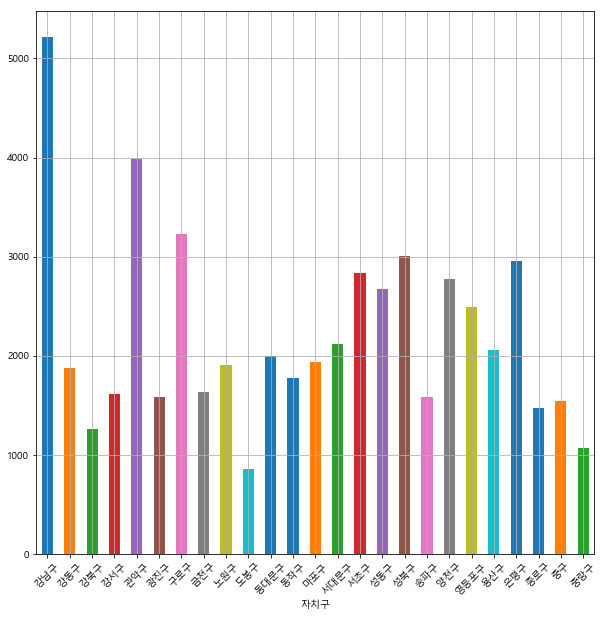

In [77]:
# cctv자료를 bar차트로 표현
# 소계의 자치구별 바차트 시각화 
plt.figure()
data_result['소계'].plot(kind='bar', grid=True, figsize=(10,10), rot=45 ) # 소계만 가지고오는 차원축소니깐 Series로 작성(컬럼한개면 그래프의 효율상 시리즈가 합리적이다)
# grid : 격자, rot: 축네임 프레임을 비튼다
plt.show()

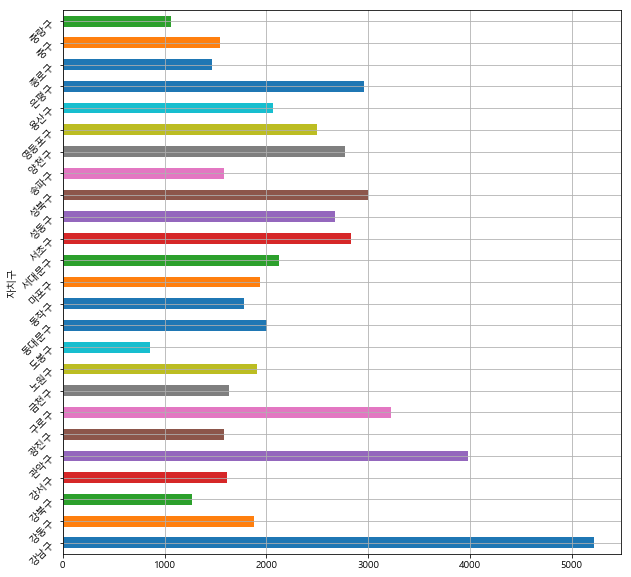

In [78]:
# cctv자료를 bar차트로 표현
# 소계의 자치구별 바차트 시각화 
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10), rot=45 ) # 소계만 가지고오는 차원축소니깐 Series로 작성(컬럼한개면 그래프의 효율상 시리즈가 합리적이다)
# grid : 격자, rot: 축네임 프레임을 비튼다
plt.show()

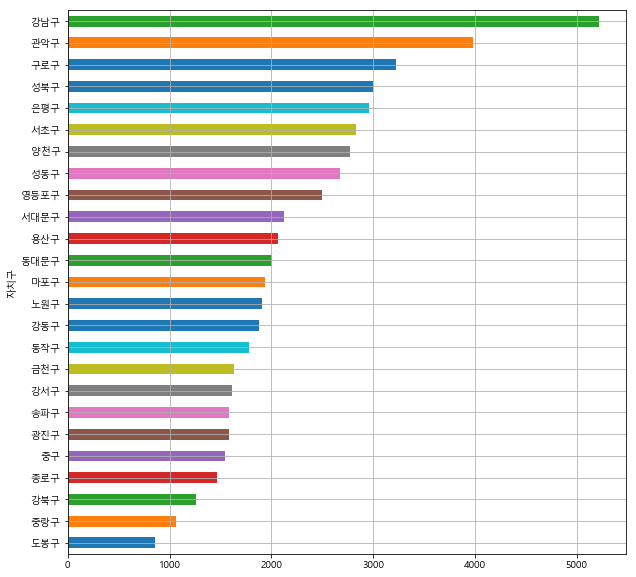

In [79]:
plt.figure()

data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10) ) 

plt.show()
# 강남, 관악, 구로구가 상위권을 차지하고, 강남구는 그중에서 압도적으로 설치 대수가 많다.
# 도봉구가 최소량의 설치 수를 가지고 있다.

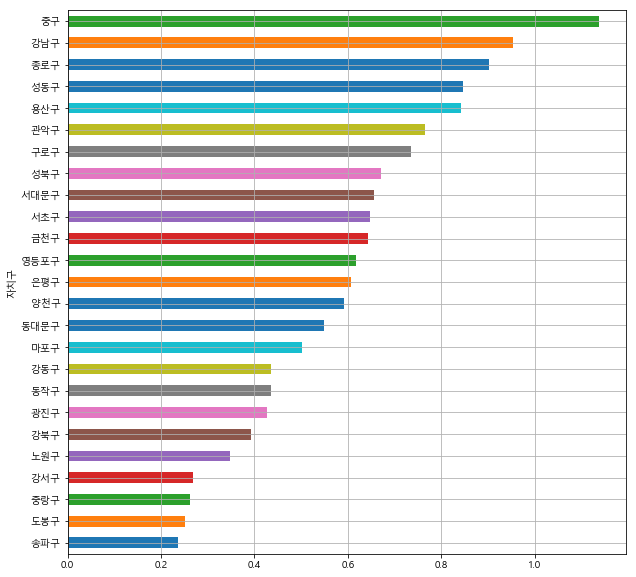

In [81]:
# 인구대비 CCTV설치 비율을 계산하여 정렬해보자!!
# 컬럼명 => CCTV비율 계산 => 정렬 => 시각화( bar차트(수평처리) )
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10) ) 
plt.show()
# 중구가 인구대비 cctv 설치율 1위, 중구는 cctv 설치 개수가 낮은 편인데, 주거지가 적고,
# 상업지구나 회사가 많이 위치해 있어서 유동인구가 많은 편이라 이렇게 결과가 나온것으로 보인다.
# 그럼에도 불구하고, 강남구 2위에 위치해 있어서 설치대수가 많고, 상주인구도 많음을 알 수 있다.
# 보동구는 여전히 하위권, 송파구가 비율적으로 가장 적다.( 인구가 cctv대비 더 많다 )

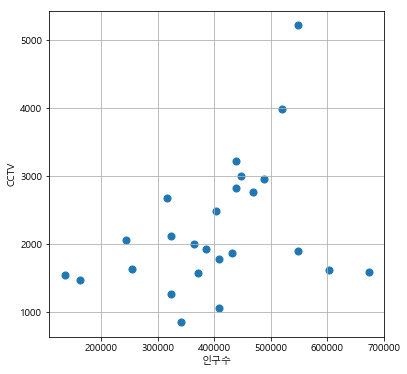

In [84]:
# 산포도, 평균선 작성 
# 인구대비 CCTV 설치 비율이 가장 적정한 자치구는 ?
plt.figure(figsize=(6,6))
plt.scatter( data_result['인구수'], data_result['소계'], s=50 )
plt.xlabel('인구수') # x축
plt.ylabel('CCTV') # y축
plt.grid()
plt.show()

In [85]:
# 위의 산포도 기준으로 데이터의 분포를 설명할 수 있는 기울기가 1인 직선값을 찾는 방법
# polyfit()
fq1 = np.polyfit( data_result['인구수'], data_result['소계'], 1) # 기울기: 1
# y = ax + b 
# a : 기울기
# b : 절편
fq1
# 결과값 : [기울기, 절편] 해서 array로 나온다 

array([2.85240371e-03, 1.07309855e+03])

In [87]:
# 함수를 구성
f1 = np.poly1d( fq1 ) # 위에서 구한 기울기와 절편을 넣어서 함수를 생성하는 함수
# type확인
type(f1)

numpy.lib.polynomial.poly1d

In [88]:
# 산포도에서의 기울기가 1인 직선 표현
# x축 데이터가 고르게 가는 것이 필요함,
# 100000~700000사이를 100개로 구간을 나눈다
fx = np.linspace( 100000, 700000, 100) # 10만에서 70만 사이를 100칸으로 쪼개는 것
len(fx)

100

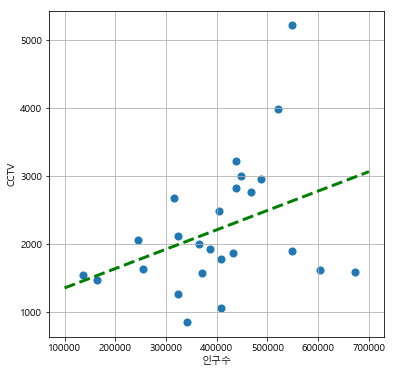

In [89]:
# 위에 작성된 산포도 소스코드를 그대로 가지고온 이후 수정
plt.figure(figsize=(6,6))
plt.scatter( data_result['인구수'], data_result['소계'], s=50 )
# 인구수 대비 cctv 수에 대한 직선을 그려본다
plt.plot( fx, f1(fx), ls='dashed', color='g', lw=3 ) # x축 : fx, y축 : f1, ls : 선의 모양에 관한 것
plt.xlabel('인구수') # x축
plt.ylabel('CCTV') # y축
plt.grid()
plt.show()

In [91]:
# comment : 직선은 대표값이다.
# 인구수 40만명일 때, 적정 CCTV 설치 대수는?
tmp = [400000]
f1(tmp)

array([2214.06003236])

In [ ]:
# 산포도 포인트에 자치구를 표현(텍스트를 구현해보는 것)
# 대표값 기준으로 포인트들의 거리를 계산해서 멀수록 색상을 진하게 혹은 연하게 처리
# 색상으로도 설명할 수 있도록 데코레이션 처리 

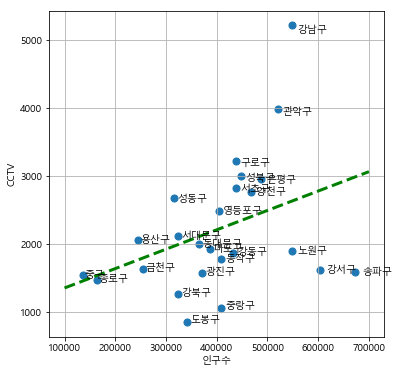

In [94]:
# 산포도
plt.figure(figsize=(6,6))
plt.scatter( data_result['인구수'], data_result['소계'], s=50 )
plt.plot( fx, f1(fx), ls='dashed', color='g', lw=3 ) # x축 : fx, y축 : f1, ls : 선의 모양에 관한 것
# 포인트에 자치구 표현
# 기준은 대상선정, 좌표(X1=X*1.02(0.2%가 키움), Y1=Y*0.98(0.2%를 줄여라))가 필요하다
# 현재는 전체를 드로잉 했으나, 향후 목적에 따라 특정 자치구만 노출시킬 수 있다
for n in range( data_result.shape[0] ): # 데이터 25개가 나옴, 연속수를 쓰겠다는 뜻이다
    plt.text( data_result['인구수'][n]*1.02,   # x 
              data_result['소계'][n]*0.98,     # y 
              data_result.index[n], fontsize=10 # 텍스트
            ) # 문자열을 그리는 뜻, 시리중(인구수)중에 n번째 0.2증가,감소
plt.xlabel('인구수') # x축
plt.ylabel('CCTV') # y축
plt.grid()
plt.show()

In [95]:
# 거리 계산, 오차,
# 공식 = 절대값|cctv수 - 해당인구수의 평균cctv수| , *절대값으로 만들어줌
data_result['오차']=np.abs( data_result['소계'] - f1( data_result['인구수'] ) ) # 절대값 처리
data_result['오차']

자치구
강남구     2586.344483
강동구      426.108759
강북구      729.182492
강서구     1177.840805
관악구     1428.537426
광진구      550.520026
구로구      903.162358
금천구      163.668991
노원구      730.672166
도봉구     1189.619423
동대문구     109.337611
동작구      460.829841
마포구      240.150393
서대문구     126.346861
서초구      512.083685
성동구      703.221217
성북구      652.917392
송파구     1408.212414
양천구      366.562917
영등포구     270.671314
용산구      290.805827
은평구      497.881144
종로구       67.114515
중구        84.021380
중랑구     1169.298565
Name: 오차, dtype: float64

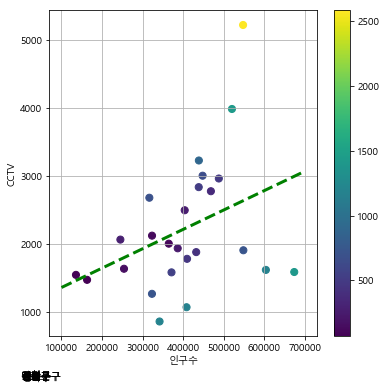

In [105]:
# 거리가 먼 자치구 3곳, 거리가 가까운 자치구 3곳 표시

plt.figure(figsize=(6,6))
# 칼라맵을 활성화 시킴(밀도화)
plt.scatter( data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'] )
plt.plot( fx, f1(fx), ls='dashed', color='g', lw=3 ) 
# 오차기준 가장 큰값을 가진 자치구 3개와 가장 작은값을 가진 자치구 3개를 표현하라
# 글자만 3개, 3개 드로잉
for n in range( data_result.shape[0] ): 
    plt.text( data_result['인구수'][n]*1.02,   
              data_result['소계'][n]*0.98,
              data_result.index[n], fontsize=10
            ) 
plt.xlabel('인구수') 
plt.ylabel('CCTV') 
plt.grid()
# 칼라바를 표현한다
plt.colorbar()
plt.show()

In [112]:
# 오차의 top 3
list(data_result.sort_values( by='오차', ascending=False ).index[:3])

['강남구', '관악구', '송파구']

In [113]:
# 오차의 bottom 3
list(data_result.sort_values( by='오차', ascending=False ).index[-3:])

['동대문구', '중구', '종로구']

In [118]:
# 오차의 상,하위 3개씩의 데이터를 묶어서 자료 표현
tmp    = data_result.sort_values( by='오차', ascending=False )
target = list(tmp.index[:3]) + list(tmp.index[-3:])
target

['강남구', '관악구', '송파구', '동대문구', '중구', '종로구']

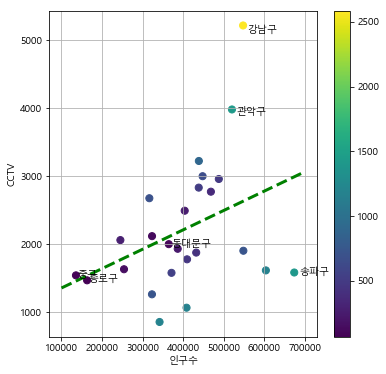

In [119]:
plt.figure(figsize=(6,6))
plt.scatter( data_result['인구수'], data_result['소계'], s=50, c=data_result['오차'] )
plt.plot( fx, f1(fx), ls='dashed', color='g', lw=3 ) 
for n in range( data_result.shape[0] ):
    # 그리고자 하는 텍스트가 대상 맴버중에 포함되어 있는가? 리스트 내부에 있는가?
    if data_result.index[n] in target:
        plt.text( data_result['인구수'][n]*1.02,   
                  data_result['소계'][n]*0.98,
                  data_result.index[n], 
                 fontsize=10
                ) 
plt.xlabel('인구수') 
plt.ylabel('CCTV') 
plt.grid()
# 칼라바를 표현한다
plt.colorbar()
plt.show()
# 강남구, 관악구, 송파구는 인구대비 cctv 현황이 현저이 크거나(2개), 작다(1개)
# 이들은 예산 삭감 및 증액등의 기존 예산검토후 액션을 취해야 한다
# 중구, 종로구, 동대문구는 아주 효율적으로 cctv를 증설해 왔다 => 포상개념 xx 지원하다

In [120]:
# 자료 덤프
data_result.to_csv( '../data/populate_per_cctv_analysis_result.csv', sep=',', 
                      encoding='utf-8') # csv는 구분자가 중요하다, sep

In [ ]:
# 쥬피터 readme.txt로 이동해서 내용 작성(5대범죄 데이터 다운로드 진행하는 내용임)